# Notes
Source of dataset: https://www.kaggle.com/datasets/swadeshi/stress-detection-dataset

This dataset consists of 3000 rows, representing daily data for 100 participants over a period of 30 days. The data captures various psychological, behavioral, and physiological attributes for each participant. Below is a breakdown of the columns:

participant_id: Unique identifier for each participant. Data type: Integer
Range: 1 to 100 (as there are 100 participants)

day:The day of observation for each participant. Data type: Integer

Range: 1 to 30 (each participant is observed over 30 days)

PSS_score:Perceived Stress Scale score, measuring stress levels. Data type: Integer 
Range: 10 to 40

Openness:Measure of openness to experience, a personality trait. Data type: Float
Range: 1.0 to 5.0

Conscientiousness: Measure of conscientiousness, a personality trait. Data type: Float
Range: 1.0 to 5.0

Extraversion: Measure of extraversion, a personality trait. Data type: Float
Range: 1.0 to 5.0

Agreeableness: Measure of agreeableness, a personality trait. Data type: Float
Range: 1.0 to 5.0

Neuroticism: Measure of neuroticism, a personality trait. Data type: Float
Range: 1.0 to 5.0

sleep_time: The time (in hours) the participant went to sleep. Data type: Float
Range: 5.0 to 9.0 hours

wake_time: The time (in hours) the participant woke up. Data type: Float
Range: 5.0 to 9.0 hours

sleep_duration: The duration (in hours) the participant slept. Data type: Float
Range: 6.0 to 9.0 hours

PSQI_score: Pittsburgh Sleep Quality Index (PSQI) score, measuring sleep quality. Data type: Integer
Range: 1 to 5

call_duration: Total duration of phone calls for the day (in minutes). Data type: Float
Range: 0 to 60 minutes

num_calls: Number of phone calls made during the day. Data type: Integer
Range: 0 to 20 calls

num_sms: Number of SMS messages sent during the day. Data type: Integer
Range: 0 to 50 messages

screen_on_time: Total screen-on time for the day (in hours). Data type: Float
Range: 1.0 to 12.0 hours

skin_conductance:Measure of skin conductance, indicating arousal or stress response.Data type: Float
Range: 0.5 to 5.0 µS (microsiemens)

accelerometer: Accelerometer data representing physical movement.Data type: Float
Range: 0.1 to 2.5 g (g-force)

mobility_radius: The radius of mobility for the participant (in kilometers).Data type: Float
Range: 0.1 to 1.5 km

mobility_distance: Total distance moved during the day (in kilometers).Data type: Float

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('stress_detection.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   participant_id     3000 non-null   int64  
 1   day                3000 non-null   int64  
 2   PSS_score          3000 non-null   int64  
 3   Openness           3000 non-null   float64
 4   Conscientiousness  3000 non-null   float64
 5   Extraversion       3000 non-null   float64
 6   Agreeableness      3000 non-null   float64
 7   Neuroticism        3000 non-null   float64
 8   sleep_time         3000 non-null   float64
 9   wake_time          3000 non-null   float64
 10  sleep_duration     3000 non-null   float64
 11  PSQI_score         3000 non-null   int64  
 12  call_duration      3000 non-null   float64
 13  num_calls          3000 non-null   int64  
 14  num_sms            3000 non-null   int64  
 15  screen_on_time     3000 non-null   float64
 16  skin_conductance   3000 

In [6]:
df.head(20)

participant_id  day  PSS_score  Openness  Conscientiousness  Extraversion  \
0                1    1         34  2.322732           4.332193      1.185878   
1                1    2         37  1.761436           3.254120      3.907281   
2                1    3         30  3.025887           1.855002      2.045900   
3                1    4         16  1.948370           4.966676      3.345225   
4                1    5         32  3.343484           2.065936      3.137843   
5                1    6         28  3.319140           4.141191      2.934202   
6                1    7         39  2.893623           1.909251      3.731296   
7                1    8         19  1.437202           1.816345      4.170692   
8                1    9         22  3.279301           3.968729      1.764378   
9                1   10         15  4.604192           4.025498      1.137726   
10               1   11         27  2.072242           1.751870      4.234105   
11               1   12         11  3.004745           4.070211      1.612571   
12               1   13         10  1.949338           1.267561      4.779320   
13               1   14         11  2.031745           1.258817      3.043383   
14               1   15         19  2.383593           1.380123      4.914565   
15               1   16         22  4.682102           2.088403      1.935074   
16               1   17         17  2.073730           1.519221      2.082771   
17               1   18         14  4.338002           4.957890      4.299735   
18               1   19         23  4.437879           2.624819      4.450318   
19               1   20         36  4.710135           1.804234      2.671077   

    Agreeableness  Neuroticism  sleep_time  wake_time  sleep_duration  \
0        1.570213     3.782094    7.726792   5.190660        6.572069   
1        4.072512     1.997145    7.312674   6.170717        8.030168   
2        2.317493     3.619225    6.992060   5.318825        7.102420   
3        1.607756     3.583524    8.886914   8.061075        8.123294   
4        2.118061     2.567347    7.811705   7.312145        7.785143   
5        1.416814     3.901544    8.799540   8.602325        8.030797   
6        1.914267     3.165248    8.251176   8.029626        7.944314   
7        3.716547     1.645627    8.433565   6.427281        8.558427   
8        4.443119     1.326407    8.307685   8.034998        6.134476   
9        3.677640     4.682931    8.097748   7.456953        7.248696   
10       1.543625     1.552547    5.363911   6.961861        6.738963   
11       2.588673     2.925218    7.567425   6.517023        8.897186   
12       4.420397     4.436599    5.953419   8.097233        8.378754   
13       2.938282     1.465425    6.699617   5.896418        6.517389   
14       2.772440     2.810656    8.709219   8.559235        8.404725   
15       3.755055     1.670593    6.069828   5.974020        8.657142   
16       3.809349     4.268665    6.845368   6.134735        6.205277   
17       2.047967     3.581551    7.755778   5.529459        7.992297   
18       4.883222     1.116347    8.785341   7.570938        7.454898   
19       1.032064     4.599416    7.652695   6.408338        8.028311   

    PSQI_score  call_duration  num_calls  num_sms  screen_on_time  \
0            1       3.924527         12       32       10.703714   
1            4      58.318004          3       41       11.012939   
2            1       4.941043          4       48        4.877372   
3            3       0.295373         11       38        3.462956   
4            3      22.300571         17       17        4.861046   
5            4      55.459850          4       14        7.883468   
6            3      28.972359          4        3        9.096195   
7            3      47.342943          3       37        1.395497   
8            1      36.755438          3       16        5.377928   
9            4       3.391413          7       31        7.723512   
10       

In [4]:
df.shape

(3000, 20)

In [5]:
#Check for missing values
df.isnull().sum()

participant_id       0
day                  0
PSS_score            0
Openness             0
Conscientiousness    0
Extraversion         0
Agreeableness        0
Neuroticism          0
sleep_time           0
wake_time            0
sleep_duration       0
PSQI_score           0
call_duration        0
num_calls            0
num_sms              0
screen_on_time       0
skin_conductance     0
accelerometer        0
mobility_radius      0
mobility_distance    0
dtype: int64

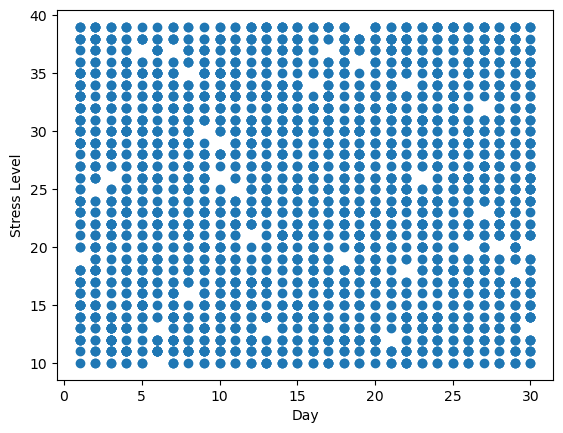

In [11]:
# View if their are any correlation of day and stress level

plt.scatter(df['day'], df['PSS_score'])
plt.xlabel('Day')
plt.ylabel('Stress Level')
plt.show()

In [12]:
#Day has no correlation nor will it be needed as a predictive feature. Remove day
filtered_df = df.drop('day', axis=1)
#Also remove personal identifiers as it will not be a good identifiable feature for unseen data.
filtered_df.drop('participant_id', axis=1, inplace=True)
filtered_df.head()

PSS_score  Openness  Conscientiousness  Extraversion  Agreeableness  \
0         34  2.322732           4.332193      1.185878       1.570213   
1         37  1.761436           3.254120      3.907281       4.072512   
2         30  3.025887           1.855002      2.045900       2.317493   
3         16  1.948370           4.966676      3.345225       1.607756   
4         32  3.343484           2.065936      3.137843       2.118061   

   Neuroticism  sleep_time  wake_time  sleep_duration  PSQI_score  \
0     3.782094    7.726792   5.190660        6.572069           1   
1     1.997145    7.312674   6.170717        8.030168           4   
2     3.619225    6.992060   5.318825        7.102420           1   
3     3.583524    8.886914   8.061075        8.123294           3   
4     2.567347    7.811705   7.312145        7.785143           3   

   call_duration  num_calls  num_sms  screen_on_time  skin_conductance  \
0       3.924527         12       32       10.703714          3.115730   
1      58.318004          3       41       11.012939          0.959144   
2       4.941043          4       48        4.877372          3.311629   
3       0.295373         11       38        3.462956          0.625721   
4      22.300571         17       17        4.861046          0.622609   

   accelerometer  mobility_radius  mobility_distance  
0       0.161717         1.145179           2.196851  
1       0.985587         1.021133           0.737825  
2       1.877445         0.478179           0.911673  
3       0.494921         0.630549           3.911418  
4       1.342600         0.254090           1.605132

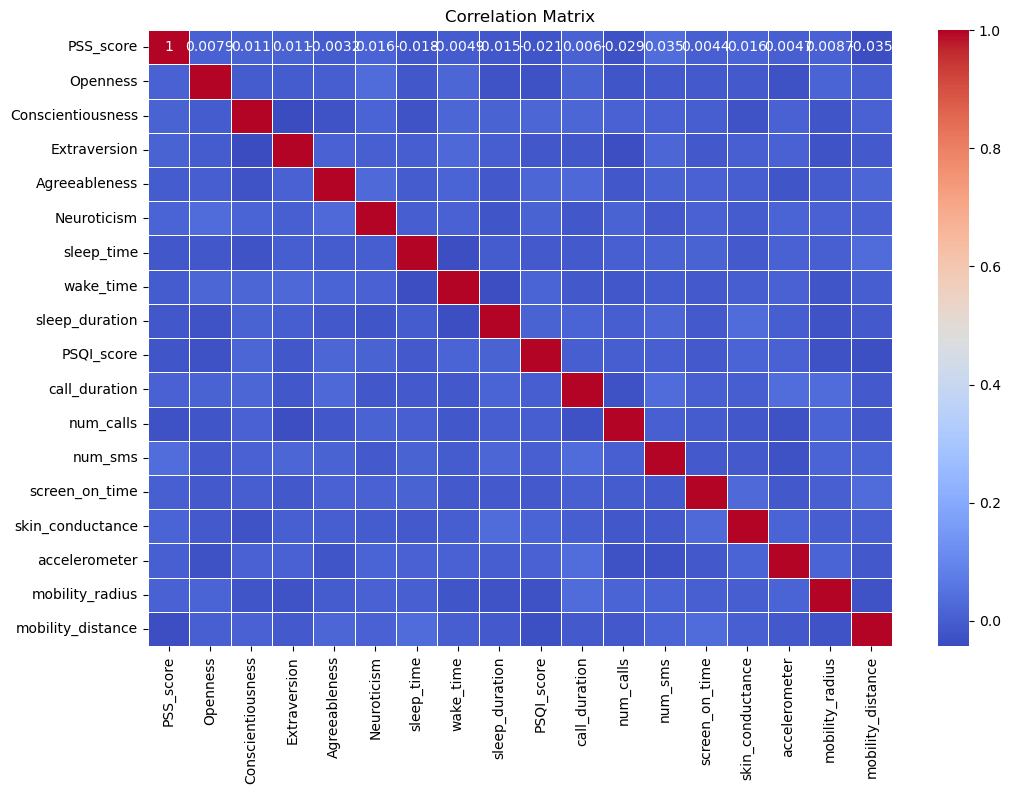

<Figure size 640x480 with 0 Axes>

In [21]:
#View correlation between features
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
plt.clf()
#No correlation found between features

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

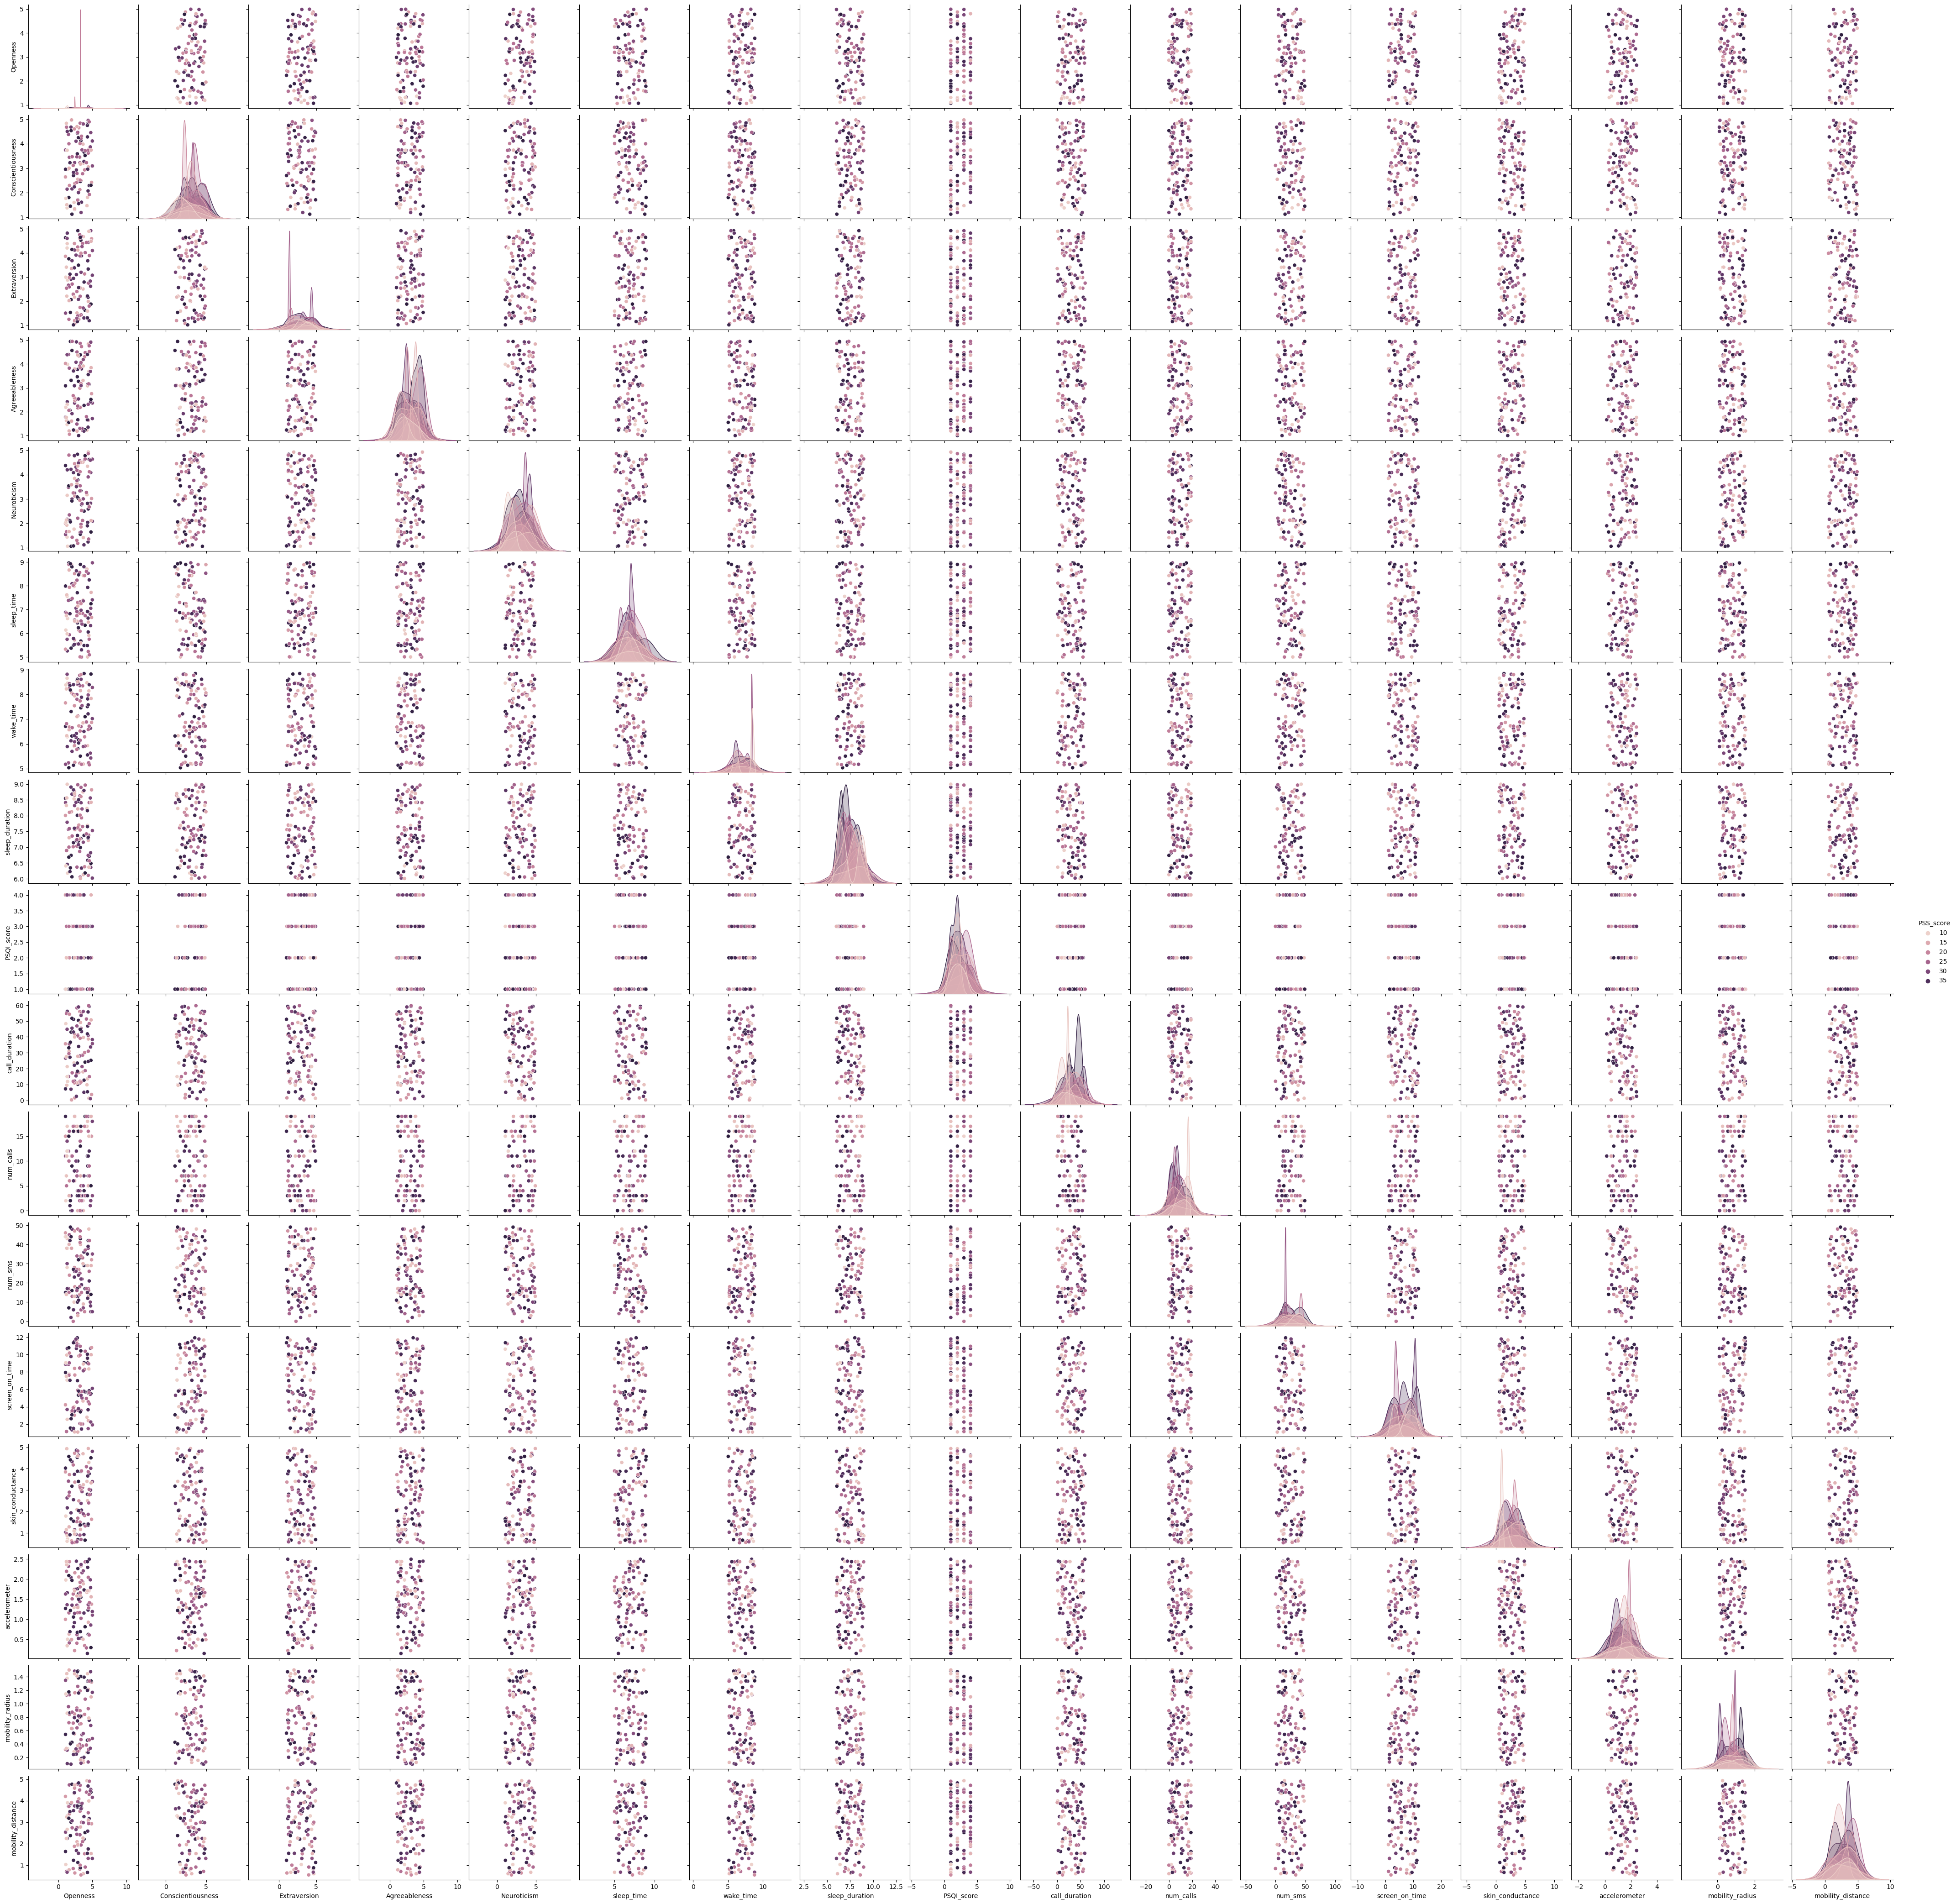

In [23]:
#scatter plot matrix
sample_df = filtered_df.sample(n=100, random_state=1)
sns.pairplot(sample_df, hue='PSS_score')

# Groupby Participant

In [27]:
df[df['participant_id']==1].head()

participant_id  day  PSS_score  Openness  Conscientiousness  Extraversion  \
0               1    1         34  2.322732           4.332193      1.185878   
1               1    2         37  1.761436           3.254120      3.907281   
2               1    3         30  3.025887           1.855002      2.045900   
3               1    4         16  1.948370           4.966676      3.345225   
4               1    5         32  3.343484           2.065936      3.137843   

   Agreeableness  Neuroticism  sleep_time  wake_time  sleep_duration  \
0       1.570213     3.782094    7.726792   5.190660        6.572069   
1       4.072512     1.997145    7.312674   6.170717        8.030168   
2       2.317493     3.619225    6.992060   5.318825        7.102420   
3       1.607756     3.583524    8.886914   8.061075        8.123294   
4       2.118061     2.567347    7.811705   7.312145        7.785143   

   PSQI_score  call_duration  num_calls  num_sms  screen_on_time  \
0           1       3.924527         12       32       10.703714   
1           4      58.318004          3       41       11.012939   
2           1       4.941043          4       48        4.877372   
3           3       0.295373         11       38        3.462956   
4           3      22.300571         17       17        4.861046   

   skin_conductance  accelerometer  mobility_radius  mobility_distance  
0          3.115730       0.161717         1.145179           2.196851  
1          0.959144       0.985587         1.021133           0.737825  
2          3.311629       1.877445         0.478179           0.911673  
3          0.625721       0.494921         0.630549           3.911418  
4          0.622609       1.342600         0.254090           1.605132

In [29]:
player_df = df.groupby('participant_id').mean()
player_df.drop('day', axis=1, inplace=True)
player_df.head(10)

PSS_score  Openness  Conscientiousness  Extraversion  \
participant_id                                                         
1               24.066667  2.969871           2.936993      3.122456   
2               26.100000  2.827940           3.001828      3.008937   
3               24.800000  3.235542           3.138758      3.522825   
4               26.233333  3.077437           3.082911      3.278380   
5               28.033333  3.191693           2.836798      3.235874   
6               24.633333  2.908744           2.953503      2.930673   
7               23.900000  2.929563           3.185445      2.947627   
8               23.500000  2.981908           2.929090      2.848867   
9               24.966667  3.478999           3.021777      3.197153   
10              23.333333  3.177481           2.919994      2.629343   

                Agreeableness  Neuroticism  sleep_time  wake_time  \
participant_id                                                      
1                    2.854310     2.926617    7.269013   6.956866   
2                    3.081391     3.086240    6.742281   6.810500   
3                    3.219264     3.155350    6.839895   7.064615   
4                    3.341137     3.381396    6.756088   6.877770   
5                    3.630611     2.704031    7.022556   7.027996   
6                    2.900119     3.113690    6.858204   7.152040   
7                    3.308121     2.746387    7.242874   6.866795   
8                    2.845579     2.820163    6.997217   7.096019   
9                    2.720188     2.974366    6.740892   7.035668   
10                   2.855228     3.014337    7.382149   7.020356   

                sleep_duration  PSQI_score  call_duration  num_calls  \
participant_id                                                         
1                     7.540548    2.633333      19.760314   8.500000   
2                     7.384599    2.433333      29.172357  11.100000   
3                     7.466395    2.500000      28.073702   9.433333   
4                     7.464438    2.566667      23.602981  10.800000   
5                     7.195167    2.333333      28.302501   8.333333   
6                     7.518434    2.333333      23.540772   8.900000   
7                     7.648481    2.633333      32.564275   8.900000   
8                     7.551971    2.200000      26.309994   9.733333   
9                     7.382428    2.400000      25.477448   8.633333   
10                    7.545691    2.700000      31.390846   8.533333   

                  num_sms  screen_on_time  skin_conductance  accelerometer  \
participant_id                                                               
1               21.933333        6.485120          2.695539       1.158174   
2               19.900000        6.131251          2.327401       1.439580   
3               25.966667        6.958746          2.748044       1.411158   
4               25.500000        6.362512          2.675821       1.317718   
5               26.366667        6.160440          3.035382       1.277119   
6               21.833333        6.728072          2.615829       1.276041   
7               24.500000        5.970100          2.544753       1.260154   
8               23.633333        5.174174          2.943002       1.174787   
9               18.966667        6.594835          2.538307       1.142102   
10              21.866667        6.162020          2.651105       1.206402   

                mobility_radius  mobility_distance  
participant_id                                      
1                      0.671508           2.549460  
2                      0.862241           2.683636  
3                      0.753431           2.899066  
4                      0.878416           2.970955  
5                      0.748953           3.015329  
6                      0.695252           2.263064  
7                      0.806716           2.334835  
8                      0.734903           2

In [36]:
#Verify if numbers increased throughout the day
day_df = df.groupby('day').mean()
day_df.drop('participant_id', axis=1, inplace=True)
day_df.head(20)


PSS_score  Openness  Conscientiousness  Extraversion  Agreeableness  \
day                                                                        
1        25.50  2.878062           2.899660      3.031109       2.952882   
2        25.10  2.885512           2.961297      3.125902       3.196358   
3        22.92  3.036174           2.924143      2.971910       3.136984   
4        24.74  2.963068           2.947584      3.067512       2.949566   
5        24.12  3.259643           3.079203      2.936892       3.278677   
6        25.11  2.954116           2.924240      3.035971       2.963439   
7        23.33  3.043081           3.007394      2.900526       3.294684   
8        24.70  3.042347           2.892826      2.839429       2.919778   
9        23.91  2.961728           2.928267      3.055767       3.008552   
10       24.65  3.032340           3.090409      3.062386       3.144415   
11       24.98  2.962052           3.105316      2.858927       3.082548   
12       24.06  3.198511           3.040730      3.038555       3.121543   
13       25.46  3.023832           3.036974      3.055956       2.925269   
14       25.90  2.873899           3.178927      2.994355       3.182427   
15       24.85  2.966392           3.031457      3.199538       3.087510   
16       22.50  3.214263           2.930401      3.024794       3.005793   
17       25.17  3.021224           2.977781      3.026838       2.919649   
18       24.32  3.104884           2.898078      3.050634       2.964993   
19       24.10  3.042886           2.891838      2.866704       3.170045   
20       24.66  3.258733           3.051671      3.219957       2.999821   

     Neuroticism  sleep_time  wake_time  sleep_duration  PSQI_score  \
day                                                                   
1       2.957161    6.946985   7.126934        7.534493        2.36   
2       3.098087    7.119802   7.143294        7.451771        2.46   
3       2.984557    7.222067   7.221986        7.329655        2.46   
4       2.775331    6.894205   6.831732        7.674736        2.51   
5       2.817743    6.974779   6.858617        7.599209        2.58   
6       2.922556    6.969890   7.110186        7.349600        2.35   
7       3.105808    7.001044   6.906271        7.545536        2.53   
8       3.050371    6.874808   7.018536        7.462677        2.49   
9       3.105810    7.111063   7.116242        7.549861        2.41   
10      2.878570    6.967083   6.872485        7.420904        2.72   
11      2.891124    7.051450   6.938802        7.446152        2.50   
12      2.715588    7.184848   6.756538        7.364173        2.43   
13      3.143334    7.003054   7.016784        7.497369        2.37   
14      2.957814    7.012337   6.928423        7.579406        2.60   
15      2.995413    6.871709   7.164816        7.423794        2.51   
16      3.140135    7.010011   6.663492        7.468343        2.43   
17      3.168648    6.999368   7.054927        7.465776        2.74   
18      2.947882    7.058653   7.041404        7.438870        2.80   
19      2.968440    7.135678   6.961415        7.443431        2.45   
20      2.942038    6.820278   6.953008        7.457412        2.28   

     call_duration  num_calls  num_sms  screen_on_time  skin_conductance  \
day                                                                        
1        28.082945       9.57    27.40        7.169928          2.924975   
2        30.237088       9.44    25.06        6.844043          2.474819   
3        31.334617       8.72    20.71        6.148100          2.853529   
4        29.559302       9.22    24.15        6.480001          2.944242   
5        32.123190       9.45    23.69        6.349811          2.561662   
6        26.631467       9.67    23.67        6.901621          2.664205   
7        27.212212       9.27    27.08        6.602835          2.654923   
8        28.984614       8.96    24.57        6.788486          2.556257   
9        

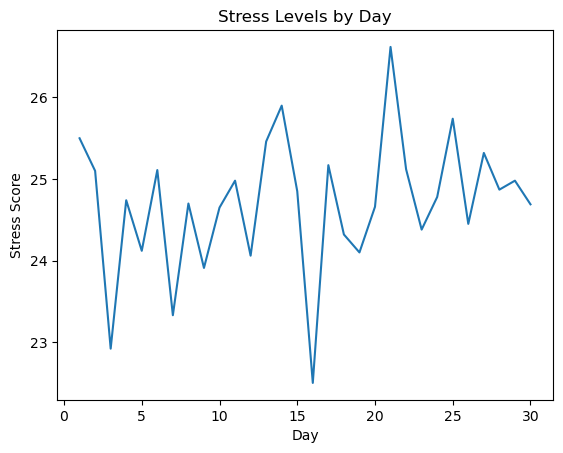

In [43]:
plt.plot(day_df.index, day_df.PSS_score)
plt.title('Stress Levels by Day')
plt.xlabel('Day')
plt.ylabel('Stress Score')
plt.show()